In [1]:
from datasets import load_from_disk
from datasets import load_dataset

/home/mapleleaf/.conda/envs/gopenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
so_ori = load_dataset("mispeech/speechocean762")
so_ori

DatasetDict({
    train: Dataset({
        features: ['accuracy', 'completeness', 'fluency', 'prosodic', 'text', 'total', 'words', 'speaker', 'gender', 'age', 'audio'],
        num_rows: 2500
    })
    test: Dataset({
        features: ['accuracy', 'completeness', 'fluency', 'prosodic', 'text', 'total', 'words', 'speaker', 'gender', 'age', 'audio'],
        num_rows: 2500
    })
})

In [4]:
so_everything = load_from_disk("/vol/tensusers6/aparikh/PhD/data/spo762/so_everything_cmu_ipa")
so_everything

Dataset({
    features: ['accuracy', 'completeness', 'fluency', 'prosodic', 'text', 'total', 'words', 'speaker', 'gender', 'age', 'audio', 'phonetic_transcription', 'phonetic_transcription_ipa', 'uttid', 'alignment', 'pure_alignment', 'phonetic_transcription_mispronunced', 'mispronounced', 'cmu_ipa_phonetic_transcription', 'cmu_ipa_mispronunciation_transcription', 'segment'],
    num_rows: 5000
})

In [5]:
def extract_phoneme_accuracies(example):
    return {
        'phoneme_accuracies': [
            acc for word in example['words'] for acc in word['phones-accuracy']
        ]
    }
so_everything = so_everything.map(extract_phoneme_accuracies)


In [6]:
so_everything_ = so_everything.remove_columns([
    'accuracy', 'completeness', 'fluency', 'prosodic', 'text', 'total',
    'words', 'speaker', 'gender', 'audio', 'phonetic_transcription',
    'phonetic_transcription_ipa', 'alignment', 'pure_alignment',
    'phonetic_transcription_mispronunced', 'mispronounced', 'segment'
])

In [7]:
train_uttids = set(entry["path"] for entry in so_ori["train"]["audio"])

In [8]:
def add_is_train_flag(example):
    return {"is_train": example["uttid"] in train_uttids}

so_everything_ = so_everything_.map(add_is_train_flag)

In [9]:
import pandas as pd
so_everything_df = pd.DataFrame(so_everything_)
so_everything_df

,age,uttid,cmu_ipa_phonetic_transcription,cmu_ipa_mispronunciation_transcription,phoneme_accuracies,is_train
0,6,000010011.wav,"[w, i, k, ɔ, l, ɪ, t, b, ɛ, ɹ]","[w, i, k, ɔ, l, ɪ, t, b, ɛ, ɹ]","[2.0, 2.0, 2.0, 1.8, 1.8, 2.0, 2.0, 2.0, 1.0, ...",True
1,6,000010035.wav,"[z, ɪ, ɹ, oʊ, θ, ɹ, i, f, aɪ, v, w, ə, n]","[z, ɪ, ɹ, oʊ, θ, ɹ, i, f, aɪ, v, w, ə, n]","[2.0, 1.4, 1.4, 2.0, 1.2, 2.0, 2.0, 2.0, 2.0, ...",True
2,6,000010053.wav,"[θ, ɹ, i, t, u, t, u, s, ɛ, v, n]","[θ, ɹ, i, t, u, t, u, s, ɛ, v, n]","[1.8, 2.0, 2.0, 2.0, 1.8, 2.0, 1.8, 2.0, 2.0, ...",True
3,6,000010063.wav,"[ɛ, l, ɪ, f, ə, n, t, s, t, aɪ, ɡ, u, s]","[ɛ, l, ɪ, f, ə, n, t, s, t, aɪ, ɡ, u, s]","[2.0, 2.0, 2.0, 2.0, 1.8, 2.0, 2.0, 2.0, 2.0, ...",True
4,6,000010069.wav,"[t, ɑ, m, ɡ, ɪ, v, z, ə, p, b, ɑː, k, s, ɪ, ŋ]","[t, ɑ, m, ɡ, ɪ, v, z, ə, p, b, ɑː, k, s, ɪ, ŋ]","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.8, 2.0, 2.0, ...",True
...,...,...,...,...,...,...
4995,20,096470019.wav,"[m, aɪ, f, ɑː, ð, ə, s, v, ɔɪ, s, s, aʊ, n, d,...","[m, aɪ, f, eɪ, θ, <DEL>, s, v, eɪ, s, s, <unk>...","[2.0, 1.6, 1.6, 0.0, 0.0, 0.4, 0.8, 0.8, 0.0, ...",False
4996,20,096470020.wav,"[m, eɪ, b, i, w, i, ʃ, ʊ, d, ɡ, ɛ, t, s, ə, m,...","[m, eɪ, b, i, w, i, ʃ, ʊ, d, ɡ, ɛ, t, s, ə, m,...","[2.0, 1.6, 2.0, 2.0, 2.0, 1.8, 2.0, 2.0, 1.8, ...",False
4997,20,096470021.wav,"[m, ɔ, ð, ə, n, j, uː, ʒ, u, ə, l, æ, t, ɛ, n,...","[m, ɔ, <unk>, <unk>, <unk>, ʌ, s, <DEL>, <DEL>...","[2.0, 1.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
4998,20,096470022.wav,"[h, ə, m, aɪ, n, d, s, t, ɑː, t, ɪ, d, f, ɚ, ɡ...","[h, <unk>, m, ɛ, n, t, s, <unk>, <unk>, <unk>,...","[2.0, 0.0, 1.6, 0.4, 1.2, 0.0, 1.2, 0.0, 0.0, ...",False


# Posterior Probability

In [10]:
import pandas as pd 
df = pd.read_csv("/vol/tensusers6/aparikh/PhD/CTC-based-GOP/quantification/speechocean_evaluation/phoneme_alignment_CTC_SEGMENT_mean.csv")
df = pd.merge(df, so_everything_df[['uttid', 'is_train', 'age']], on='uttid', how='left')

In [11]:
df.head()

,uttid,actual_phoneme,mispronounced_phoneme,start_time,end_time,confidence,prosetrior_probability,max_logit,mean_logit_margin,logit_variance,combined_score,phoneme_accuracy,mispronounced,is_train,age
0,000010011.wav,w,w,0.185,0.695,0.982,0.034765,7.572031,-11.379946,5.154630,-8.973703,2.0,False,True,6
1,000010011.wav,i,i,0.695,0.736,0.739,0.107617,5.707478,-6.709882,8.616028,-5.365671,2.0,False,True,6
2,000010011.wav,k,k,0.736,1.038,0.941,0.061695,9.004370,-8.495229,7.696086,-6.782325,2.0,False,True,6
3,000010011.wav,ɔ,ɔ,1.038,1.159,0.860,0.025340,5.670923,-8.983304,4.582684,-7.390930,1.8,False,True,6
4,000010011.wav,l,l,1.159,1.260,0.920,0.110163,6.362773,-4.890069,5.699479,-4.084786,1.8,False,True,6


/tmp/ipykernel_1685781/3240672594.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=10)


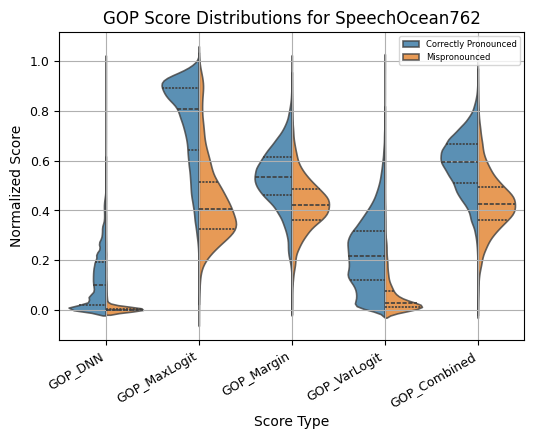

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Selecting relevant columns for normalization
columns_to_normalize = [
    "prosetrior_probability", "max_logit", "mean_logit_margin", "logit_variance", "combined_score"
]

# Normalizing the scores using Min-Max Scaler
scaler = MinMaxScaler()
df_new_normalized = df.copy()
df_new_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Melt the dataframe for visualization with mispronunciation status
df_melted_new = df_new_normalized.melt(
    id_vars=["mispronounced"], value_vars=columns_to_normalize, 
    var_name="Score Type", value_name="Normalized Score"
)

# Using plain text labels instead of LaTeX for reliability
plain_text_labels = {
    "prosetrior_probability": "GOP_DNN",
    "max_logit": "GOP_MaxLogit",
    "mean_logit_margin": "GOP_Margin",
    "logit_variance": "GOP_VarLogit",
    "combined_score": "GOP_Combined"
}

# Replacing the labels in the melted DataFrame
df_melted_new["Score Type"] = df_melted_new["Score Type"].map(plain_text_labels)

# Creating a refined violin plot with better aesthetics and balanced widths
fig, ax = plt.subplots(figsize=(6, 4))  # Larger for readability

# Plotting the violin plot with enhanced aesthetics
sns.violinplot(
    x="Score Type", y="Normalized Score", hue="mispronounced", 
    data=df_melted_new, split=True, inner="quartile", linewidth=1.2, 
    alpha=0.8, ax=ax, density_norm='width'  # Ensuring equal width for both sides
)

# Formatting the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=10)
ax.set_title("GOP Score Distributions for SpeechOcean762", fontsize=12)
ax.set_xlabel("Score Type", fontsize=10)
ax.set_ylabel("Normalized Score", fontsize=10)

# Adjusting legend aesthetics to be clean and readable
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, ["Correctly Pronounced", "Mispronounced"],  
    fontsize=6, title_fontsize=7, loc="upper right", frameon=True, markerscale=0.6
)

# Removing grid lines for a cleaner look
ax.grid(True)

# Adjusting tick sizes
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Display the improved plot
plt.show()


In [1]:
import pandas as pd 
df = pd.read_csv("/vol/tensusers6/aparikh/PhD/CTC-based-GOP/quantification/speechocean_evaluation/phoneme_alignment_CTC_SEGMENT_mean.csv")

/tmp/ipykernel_4100476/943549429.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=3)


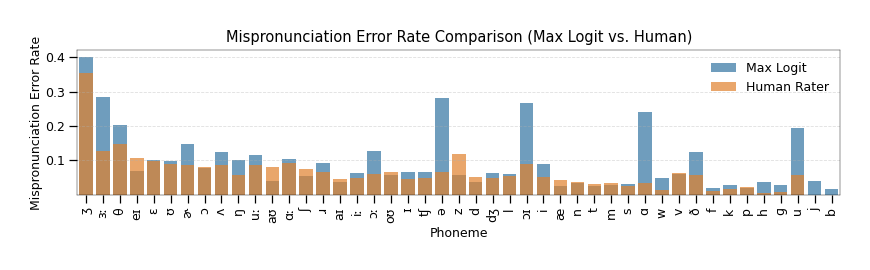

(np.float64(1.7631564712524415), np.float64(0.3500044203541562))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import matthews_corrcoef
import numpy as np

# Compute mispronunciation rate per phoneme
phoneme_mispronounce_rate = df.groupby("actual_phoneme")["mispronounced"].mean()

# Sort phonemes by mispronunciation rate in descending order
phoneme_mispronounce_rate_sorted = phoneme_mispronounce_rate.sort_values(ascending=False)

# Find the optimal threshold for max_logit using MCC
percentiles = np.percentile(df["max_logit"], np.arange(1, 100, 1))

best_mcc = -1
best_threshold = None

for threshold in percentiles:
    predictions = df["max_logit"] < threshold  # Predict mispronunciation if max_logit is below threshold
    mcc = matthews_corrcoef(df["mispronounced"], predictions)
    
    if mcc > best_mcc:
        best_mcc = mcc
        best_threshold = threshold

# Apply the best threshold to determine predicted mispronunciations
df["predicted_mispronounced"] = df["max_logit"] < best_threshold

# Compute error rate per phoneme using max_logit thresholding
phoneme_error_rate_max_logit = df.groupby("actual_phoneme")["predicted_mispronounced"].mean()

# Compute error rate per phoneme using human-rated phoneme accuracy scores
phoneme_error_rate_phoneme_accuracy = df.groupby("actual_phoneme")["phoneme_accuracy"].mean()

# Normalize phoneme accuracy error rate (since higher accuracy means lower error)
phoneme_error_rate_phoneme_accuracy = 1 - (phoneme_error_rate_phoneme_accuracy / phoneme_error_rate_phoneme_accuracy.max())

# Align phonemes across both methods
phonemes_sorted = phoneme_mispronounce_rate_sorted.index

error_rate_max_logit_sorted = phoneme_error_rate_max_logit.reindex(phonemes_sorted)
error_rate_phoneme_accuracy_sorted = phoneme_error_rate_phoneme_accuracy.reindex(phonemes_sorted)

# --- Plot Customization ---
fig, ax = plt.subplots(figsize=(3, 1), dpi=300)  # Compact size

# Bar plots
sns.barplot(x=phonemes_sorted, y=error_rate_max_logit_sorted.values, color="#1f77b4", alpha=0.7, label="Max Logit", ax=ax)
sns.barplot(x=phonemes_sorted, y=error_rate_phoneme_accuracy_sorted.values, color="#ff7f0e", alpha=0.7, label="Human Rater", ax=ax)

# --- Style Adjustments ---
ax.set_xlabel("Phoneme", fontsize=3, labelpad=1)  
ax.set_ylabel("Mispronunciation Error Rate", fontsize=3, labelpad=0.5)
ax.set_title("Mispronunciation Error Rate Comparison (Max Logit vs. Human)", fontsize=3.5, pad=2)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=3)  
ax.set_yticks([0.1, 0.2, 0.3, 0.4])  # Set fixed error rate tick labels
ax.set_yticklabels(["0.1", "0.2", "0.3", "0.4"], fontsize=3)  

# Fix the spikes (tick length, thickness, and padding)
plt.tick_params(axis='y', length=2, width=0.3, pad=1)  # Shorter tick marks, closer numbers
plt.tick_params(axis='x', length=2, width=0.3, pad=1)  # Shorter tick marks, closer numbers

# Ensure proper Y-axis limits
ax.set_ylim(0, 0.42)  # Avoid cut-off effects

# Light grid
ax.grid(axis="y", linestyle="--", linewidth=0.2, alpha=0.4)

# Thin border
for spine in ax.spines.values():
    spine.set_linewidth(0.1)

# Legend inside plot
ax.legend(fontsize=3, loc="upper right", frameon=False)

# Reduce padding
#plt.margins(x=0.01, y=0.01)
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure
# plot_path = "compact_error_rate_plot.png"
# plt.savefig(plot_path, dpi=600, bbox_inches="tight")

# Display the best threshold and MCC score
best_threshold, best_mcc


In [3]:
phoneme_mispronounce_rate = df.groupby("actual_phoneme")["mispronounced"].mean()

# Sort phonemes by mispronunciation rate in descending order
phoneme_mispronounce_rate_sorted = phoneme_mispronounce_rate.sort_values(ascending=False)

# Find the optimal threshold for max_logit using MCC
percentiles = np.percentile(df["max_logit"], np.arange(1, 100, 1))

best_mcc = -1
best_threshold = None

for threshold in percentiles:
    predictions = df["max_logit"] < threshold  # Predict mispronunciation if max_logit is below threshold
    mcc = matthews_corrcoef(df["mispronounced"], predictions)
    
    if mcc > best_mcc:
        best_mcc = mcc
        best_threshold = threshold

# Apply the best threshold to determine predicted mispronunciations
df["predicted_mispronounced"] = df["max_logit"] < best_threshold

# Compute error rate per phoneme using max_logit thresholding
phoneme_error_rate_max_logit = df.groupby("actual_phoneme")["predicted_mispronounced"].mean()

# Compute error rate per phoneme using human-rated phoneme accuracy scores
phoneme_error_rate_phoneme_accuracy = df.groupby("actual_phoneme")["phoneme_accuracy"].mean()

# Normalize phoneme accuracy error rate (since higher accuracy means lower error)
phoneme_error_rate_phoneme_accuracy = 1 - (phoneme_error_rate_phoneme_accuracy / phoneme_error_rate_phoneme_accuracy.max())

# Align phonemes across both methods
phonemes_sorted = phoneme_mispronounce_rate_sorted.index

error_rate_max_logit_sorted = phoneme_error_rate_max_logit.reindex(phonemes_sorted)
error_rate_phoneme_accuracy_sorted = phoneme_error_rate_phoneme_accuracy.reindex(phonemes_sorted)

# --- Create DataFrame Comparing Error Rates ---
error_rate_difference = pd.DataFrame({
    "Phoneme": phonemes_sorted,
    "Max Logit Error Rate": error_rate_max_logit_sorted.values,
    "Human Rater Error Rate": error_rate_phoneme_accuracy_sorted.values,
    "Difference (Max Logit - Human)": error_rate_max_logit_sorted.values - error_rate_phoneme_accuracy_sorted.values
})

# Sort the DataFrame by the difference in descending order (largest overestimation at the top)
error_rate_difference_sorted = error_rate_difference.sort_values(by="Difference (Max Logit - Human)", ascending=False)

In [5]:
error_rate_difference_sorted.to_csv("error_rate_difference.csv",index=False)

In [14]:
df.to_csv("quantification_speechocean.csv",index=False)

In [ ]:
print(df.groupby("mispronounced")["prosetrior_probability"].describe())

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure correct interpretation of scores
y_true = df["mispronounced"].astype(int)  # 1 = mispronounced, 0 = correct
y_scores = df["prosetrior_probability"]

# If higher GOP means better pronunciation (opposite of mispronounced), invert it
if df["prosetrior_probability"].corr(df["mispronounced"]) < 0.0:
    y_scores = -y_scores

# Compute AUC normally
roc_auc = roc_auc_score(y_true, y_scores)
print(f"ROC AUC: {roc_auc}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score
    
)

percentile_values = np.linspace(1, 100, 50)
thresholds = np.percentile(df['prosetrior_probability'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    df['gop_predicted_varied'] = df['prosetrior_probability'] <= threshold

    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert results to a DataFrame and display
threshold_df = pd.DataFrame(threshold_metrics)
threshold_df


In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from scipy import stats
from scipy.stats import pearsonr
import numpy as np


# Separate Train & Test sets based on `is_train` column
train_df = df[df["is_train"] == True]
test_df = df[df["is_train"] == False]

# Prepare Train Data
X_train = train_df["prosetrior_probability"].values.reshape(-1, 1)  # GOP scores
y_train = train_df["phoneme_accuracy"].values  # Human ratings

# Prepare Test Data
X_test = test_df["prosetrior_probability"].values.reshape(-1, 1)
y_test = test_df["phoneme_accuracy"].values

# Transform GOP scores with Polynomial Features (order = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model on Train Set
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on Test Set
y_pred_test = model.predict(X_test_poly)

# Round predictions to nearest valid score (0.1 increments, within min-max range)
y_pred_test_rounded = np.clip(np.round(y_pred_test / 0.1) * 0.1, min(y_test), max(y_test))

# Compute Metrics on Test Set
mse_test = mean_squared_error(y_test, y_pred_test_rounded)
pcc_test, p_value_test = pearsonr(y_test, y_pred_test_rounded)

# Confidence Interval for PCC
pcc_conf_interval_test = stats.pearsonr(y_test, y_pred_test_rounded).confidence_interval(confidence_level=0.95)

# Classification Metrics (Convert to integer classes for evaluation)
y_test_int = y_test.astype(int)
y_pred_test_int = y_pred_test_rounded.astype(int)
conf_matrix_test = confusion_matrix(y_test_int, y_pred_test_int)
class_report_test = classification_report(y_test_int, y_pred_test_int, output_dict=True)

# Store results for Test Set
evaluation_results_test = {
    "MSE (Test Set)": mse_test,
    "PCC (Test Set)": pcc_test,
    "PCC Confidence Interval (Low)": pcc_conf_interval_test.low,
    "PCC Confidence Interval (High)": pcc_conf_interval_test.high,
}

# Display evaluation metrics for Test Set
eval_df_test = pd.DataFrame.from_dict(evaluation_results_test, orient="index", columns=["Value"])
eval_df_test

# Logit scores - Maximum Logit

In [ ]:
print(df.groupby("mispronounced")["max_logit"].describe())

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score
    
)

percentile_values = np.linspace(1, 100, 100)
thresholds = np.percentile(df['max_logit'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    df['gop_predicted_varied'] = df['max_logit'] <= threshold

    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert results to a DataFrame and display
threshold_df = pd.DataFrame(threshold_metrics)



In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from scipy import stats
from scipy.stats import pearsonr
import numpy as np


# Separate Train & Test sets based on `is_train` column
train_df = df[df["is_train"] == True]
test_df = df[df["is_train"] == False]

# Prepare Train Data
X_train = train_df["max_logit"].values.reshape(-1, 1)  # GOP scores
y_train = train_df["phoneme_accuracy"].values  # Human ratings

# Prepare Test Data
X_test = test_df["max_logit"].values.reshape(-1, 1)
y_test = test_df["phoneme_accuracy"].values

# Transform GOP scores with Polynomial Features (order = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model on Train Set
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on Test Set
y_pred_test = model.predict(X_test_poly)

# Round predictions to nearest valid score (0.1 increments, within min-max range)
y_pred_test_rounded = np.clip(np.round(y_pred_test / 0.1) * 0.1, min(y_test), max(y_test))

# Compute Metrics on Test Set
mse_test = mean_squared_error(y_test, y_pred_test_rounded)
pcc_test, p_value_test = pearsonr(y_test, y_pred_test_rounded)

# Confidence Interval for PCC
pcc_conf_interval_test = stats.pearsonr(y_test, y_pred_test_rounded).confidence_interval(confidence_level=0.95)

# Classification Metrics (Convert to integer classes for evaluation)
y_test_int = y_test.astype(int)
y_pred_test_int = y_pred_test_rounded.astype(int)
conf_matrix_test = confusion_matrix(y_test_int, y_pred_test_int)
class_report_test = classification_report(y_test_int, y_pred_test_int, output_dict=True)

# Store results for Test Set
evaluation_results_test = {
    "MSE (Test Set)": mse_test,
    "PCC (Test Set)": pcc_test,
    "PCC Confidence Interval (Low)": pcc_conf_interval_test.low,
    "PCC Confidence Interval (High)": pcc_conf_interval_test.high,
}

# Display evaluation metrics for Test Set
eval_df_test = pd.DataFrame.from_dict(evaluation_results_test, orient="index", columns=["Value"])
eval_df_test

## Logit Margin score

In [ ]:
print(df.groupby("mispronounced")["mean_logit_margin"].describe())

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score
    
)

percentile_values = np.linspace(1, 100, 20)
thresholds = np.percentile(df['mean_logit_margin'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    df['gop_predicted_varied'] = df['mean_logit_margin'] < threshold

    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert results to a DataFrame and display
threshold_df = pd.DataFrame(threshold_metrics)



In [ ]:
threshold_df

In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from scipy import stats
from scipy.stats import pearsonr
import numpy as np


# Separate Train & Test sets based on `is_train` column
train_df = df[df["is_train"] == True]
test_df = df[df["is_train"] == False]

# Prepare Train Data
X_train = train_df["mean_logit_margin"].values.reshape(-1, 1)  # GOP scores
y_train = train_df["phoneme_accuracy"].values  # Human ratings

# Prepare Test Data
X_test = test_df["mean_logit_margin"].values.reshape(-1, 1)
y_test = test_df["phoneme_accuracy"].values

# Transform GOP scores with Polynomial Features (order = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model on Train Set
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on Test Set
y_pred_test = model.predict(X_test_poly)

# Round predictions to nearest valid score (0.1 increments, within min-max range)
y_pred_test_rounded = np.clip(np.round(y_pred_test / 0.1) * 0.1, min(y_test), max(y_test))

# Compute Metrics on Test Set
mse_test = mean_squared_error(y_test, y_pred_test_rounded)
pcc_test, p_value_test = pearsonr(y_test, y_pred_test_rounded)

# Confidence Interval for PCC
pcc_conf_interval_test = stats.pearsonr(y_test, y_pred_test_rounded).confidence_interval(confidence_level=0.95)

# Classification Metrics (Convert to integer classes for evaluation)
y_test_int = y_test.astype(int)
y_pred_test_int = y_pred_test_rounded.astype(int)
conf_matrix_test = confusion_matrix(y_test_int, y_pred_test_int)
class_report_test = classification_report(y_test_int, y_pred_test_int, output_dict=True)

# Store results for Test Set
evaluation_results_test = {
    "MSE (Test Set)": mse_test,
    "PCC (Test Set)": pcc_test,
    "PCC Confidence Interval (Low)": pcc_conf_interval_test.low,
    "PCC Confidence Interval (High)": pcc_conf_interval_test.high,
}

# Display evaluation metrics for Test Set
eval_df_test = pd.DataFrame.from_dict(evaluation_results_test, orient="index", columns=["Value"])
eval_df_test

# Combined Score

In [ ]:
print(df.groupby("mispronounced")["combined_score"].describe())

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score
    
)

percentile_values = np.linspace(1, 100, 20)
thresholds = np.percentile(df['combined_score'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    df['gop_predicted_varied'] = df['combined_score'] <= threshold

    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert results to a DataFrame and display
threshold_df = pd.DataFrame(threshold_metrics)



In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from scipy import stats
from scipy.stats import pearsonr
import numpy as np


# Separate Train & Test sets based on `is_train` column
train_df = df[df["is_train"] == True]
test_df = df[df["is_train"] == False]

# Prepare Train Data
X_train = train_df["combined_score"].values.reshape(-1, 1)  # GOP scores
y_train = train_df["phoneme_accuracy"].values  # Human ratings

# Prepare Test Data
X_test = test_df["combined_score"].values.reshape(-1, 1)
y_test = test_df["phoneme_accuracy"].values

# Transform GOP scores with Polynomial Features (order = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model on Train Set
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on Test Set
y_pred_test = model.predict(X_test_poly)

# Round predictions to nearest valid score (0.1 increments, within min-max range)
y_pred_test_rounded = np.clip(np.round(y_pred_test / 0.1) * 0.1, min(y_test), max(y_test))

# Compute Metrics on Test Set
mse_test = mean_squared_error(y_test, y_pred_test_rounded)
pcc_test, p_value_test = pearsonr(y_test, y_pred_test_rounded)

# Confidence Interval for PCC
pcc_conf_interval_test = stats.pearsonr(y_test, y_pred_test_rounded).confidence_interval(confidence_level=0.95)

# Classification Metrics (Convert to integer classes for evaluation)
y_test_int = y_test.astype(int)
y_pred_test_int = y_pred_test_rounded.astype(int)
conf_matrix_test = confusion_matrix(y_test_int, y_pred_test_int)
class_report_test = classification_report(y_test_int, y_pred_test_int, output_dict=True)

# Store results for Test Set
evaluation_results_test = {
    "MSE (Test Set)": mse_test,
    "PCC (Test Set)": pcc_test,
    "PCC Confidence Interval (Low)": pcc_conf_interval_test.low,
    "PCC Confidence Interval (High)": pcc_conf_interval_test.high,
}

# Display evaluation metrics for Test Set
eval_df_test = pd.DataFrame.from_dict(evaluation_results_test, orient="index", columns=["Value"])
eval_df_test

In [ ]:
print(df.groupby("mispronounced")["logit_variance"].describe())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score
    
)

percentile_values = np.linspace(1, 100, 20)
thresholds = np.percentile(df['logit_variance'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    df['gop_predicted_varied'] = df['logit_variance'] <= threshold

    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert results to a DataFrame and display
threshold_df = pd.DataFrame(threshold_metrics)
threshold_df


In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from scipy import stats
from scipy.stats import pearsonr
import numpy as np


# Separate Train & Test sets based on `is_train` column
train_df = df[df["is_train"] == True]
test_df = df[df["is_train"] == False]

# Prepare Train Data
X_train = train_df["logit_variance"].values.reshape(-1, 1)  # GOP scores
y_train = train_df["phoneme_accuracy"].values  # Human ratings

# Prepare Test Data
X_test = test_df["logit_variance"].values.reshape(-1, 1)
y_test = test_df["phoneme_accuracy"].values

# Transform GOP scores with Polynomial Features (order = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model on Train Set
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on Test Set
y_pred_test = model.predict(X_test_poly)

# Round predictions to nearest valid score (0.1 increments, within min-max range)
y_pred_test_rounded = np.clip(np.round(y_pred_test / 0.1) * 0.1, min(y_test), max(y_test))

# Compute Metrics on Test Set
mse_test = mean_squared_error(y_test, y_pred_test_rounded)
pcc_test, p_value_test = pearsonr(y_test, y_pred_test_rounded)

# Confidence Interval for PCC
pcc_conf_interval_test = stats.pearsonr(y_test, y_pred_test_rounded).confidence_interval(confidence_level=0.95)

# Classification Metrics (Convert to integer classes for evaluation)
y_test_int = y_test.astype(int)
y_pred_test_int = y_pred_test_rounded.astype(int)
conf_matrix_test = confusion_matrix(y_test_int, y_pred_test_int)
class_report_test = classification_report(y_test_int, y_pred_test_int, output_dict=True)

# Store results for Test Set
evaluation_results_test = {
    "MSE (Test Set)": mse_test,
    "PCC (Test Set)": pcc_test,
    "PCC Confidence Interval (Low)": pcc_conf_interval_test.low,
    "PCC Confidence Interval (High)": pcc_conf_interval_test.high,
}

# Display evaluation metrics for Test Set
eval_df_test = pd.DataFrame.from_dict(evaluation_results_test, orient="index", columns=["Value"])
eval_df_test